In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022_a','gfdl.ncrc4-intel19-prod'
control,machine_target0='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-091521":
    fig_casename='ms_gzCOBALT'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-013022_a gzCOBALT-013022_a


In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

# Read in data

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a


In [6]:
# read in files
#diagTypes = ['ocean_cobalt_tracers_year_z'] 
diagTypes = ['ocean_cobalt_tracers_int'] #monthly files

pp_dates='1988-2007'
#pp_dates='1953-1957'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_int.1988-2007.10.nc',

In [7]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
# read in files
#diagTypes = ['ocean_cobalt_tracers_year_z'] 
diagTypes = ['ocean_monthly_z'] #monthly files

pp_dates='1988-2007'
#pp_dates='1953-1957'

files2=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files2=sorted([f for fi in files2 for f in fi]) # nested list comprehension

if not files2:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files2=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files2=sorted([f for fi in files2 for f in fi]) # nested list comprehension

print(files2)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_monthly_z.1988-2007.11.nc'

In [9]:
# read in files
diagTypes = ['ocean_cobalt_tracers_year_z'] 

pp_dates='1988-2007'
#pp_dates='1953-1957'


files3=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files3=sorted([f for fi in files3 for f in fi]) # nested list comprehension

if not files3:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files3=[glob(pp_path + '/' + d + '/av/annual_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files3=sorted([f for fi in files3 for f in fi]) # nested list comprehension
    
print(files3)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_a/ocean_cobalt_tracers_year_z.1988-2007.nc']


In [10]:
ds=xr.open_mfdataset(files, combine='by_coords')
ds2=xr.open_mfdataset(files2, combine='by_coords')
dsy=xr.open_mfdataset(files3, combine='by_coords')

grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
grid=xr.open_dataset(grid_file)

In [11]:
ds2=ds2.groupby('time.month').mean(dim='time')
ds=ds.groupby('time.month').mean(dim='time')
ds=xr.merge([ds,ds2],compat='override')
ds=ds.rename({'month':'time'})
ds

<xarray.Dataset>
Dimensions:             (nv: 2, time: 12, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh                  (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh                  (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * nv                  (nv) float64 1.0 2.0
  * time                (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z_l                 (z_l) float64 2.5 10.0 20.0 ... 5.5e+03 6e+03 6.5e+03
  * z_i                 (z_i) float64 0.0 5.0 15.0 ... 6.25e+03 6.75e+03
  * xq                  (xq) float64 -299.5 -299.0 -298.5 ... 59.0 59.5 60.0
  * yq                  (yq) float64 -77.82 -77.63 -77.45 ... 89.58 89.79 90.0
Data variables: (12/31)
    nsmp_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgp_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ndi_100             (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    silgp_100           (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ...                  ...
    average_DT          (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    volcello            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    thetao              (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    so                  (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    uo                  (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    vo                  (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>

In [12]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
#diagTypes = ['ocean_cobalt_tracers_year_z'] 
diagTypes = ['ocean_cobalt_tracers_int'] 


pp_dates='1988-2007'
#pp_dates='1953-1957'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target0, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321
['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_int.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-06232

In [13]:
# read in files
diagTypes = ['ocean_monthly_z'] #monthly files

pp_dates='1988-2007'
#pp_dates='1953-1957'

c_files2=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files2=sorted([f for fi in c_files2 for f in fi]) # nested list comprehension

if not c_files2:
    pp_path=os.path.join(path_root, control, machine_target0, 'pp')
    
    c_files2=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files2=sorted([f for fi in c_files2 for f in fi]) # nested list comprehension

print(c_files2)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_monthly_z.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_

In [14]:
# read in files
diagTypes = ['ocean_cobalt_tracers_year_z'] 

pp_dates='1988-2007'
#pp_dates='1953-1957'

c_files3=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files3=sorted([f for fi in c_files3 for f in fi]) # nested list comprehension

if not c_files3:
    pp_path=os.path.join(path_root, control, machine_target0, 'pp')
    
    c_files3=[glob(pp_path + '/' + d + '/av/annual_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files3=sorted([f for fi in c_files3 for f in fi]) # nested list comprehension
    
print(c_files3)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_tracers_year_z.1988-2007.nc']


In [15]:
dc=xr.open_mfdataset(c_files, combine='by_coords')
dc2=xr.open_mfdataset(c_files2, combine='by_coords')
dcy=xr.open_mfdataset(c_files3, combine='by_coords')

In [16]:
dc2=dc2.groupby('time.month').mean(dim='time')
dc=dc.groupby('time.month').mean(dim='time')
dc=xr.merge([dc,dc2],compat='override')
dc=dc.rename({'month':'time'})
dc

<xarray.Dataset>
Dimensions:             (nv: 2, time: 12, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh                  (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh                  (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * nv                  (nv) float64 1.0 2.0
  * time                (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z_l                 (z_l) float64 2.5 10.0 20.0 ... 5.5e+03 6e+03 6.5e+03
  * z_i                 (z_i) float64 0.0 5.0 15.0 ... 6.25e+03 6.75e+03
  * xq                  (xq) float64 -299.5 -299.0 -298.5 ... 59.0 59.5 60.0
  * yq                  (yq) float64 -77.82 -77.63 -77.45 ... 89.58 89.79 90.0
Data variables: (12/31)
    nsmp_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgp_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ndi_100             (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    silgp_100           (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ...                  ...
    average_DT          (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    volcello            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    thetao              (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    so                  (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    uo                  (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>
    vo                  (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 35, 576, 720), meta=np.ndarray>

In [17]:
dsy['depth_levels']=xr.DataArray(dsy.z_i.diff(dim='z_i').values, coords={'z_l':dsy.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
dsy.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [18]:
dsy.depth_levels.isel(z_l=slice(0,7)).sum().values

array(112.5)

# Calculate Potential Density

Here we will use potential density calculation from Wright 97 to stay consistent with MOM6 code. (copied from mom6 analysis cookbook)

In [19]:
def pdens(S,theta):

    # --- Define constants (Table 1 Column 4, Wright 1997, J. Ocean Tech.)---
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    # To compute potential density keep pressure p = 100 kpa
    # S in standard salinity units psu, theta in DegC, p in pascals

    p = 100000.
    alpha0 = a0 + a1*theta + a2*S
    p0 = b0 + b1*theta + b2*theta**2 + b3*theta**3 + b4*S + b5*theta*S
    lambd = c0 + c1*theta + c2*theta**2 + c3*theta**3 + c4*S + c5*theta*S

    pot_dens = (p + p0)/(lambd + alpha0*(p + p0))

    return pot_dens

In [20]:
pt = xr.apply_ufunc(pdens, ds.so, ds.thetao,
                    dask='parallelized',
                    output_dtypes=[ds.so.dtype])

pty=pt.mean(dim='time')

In [21]:
pt_c = xr.apply_ufunc(pdens, dc.so, dc.thetao,
                    dask='parallelized',
                    output_dtypes=[dc.so.dtype])

pty_c = pt_c.mean(dim='time')

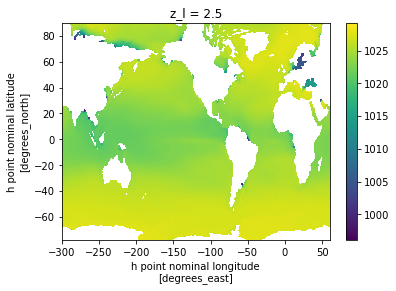

In [22]:
pty.isel(z_l=0).plot()

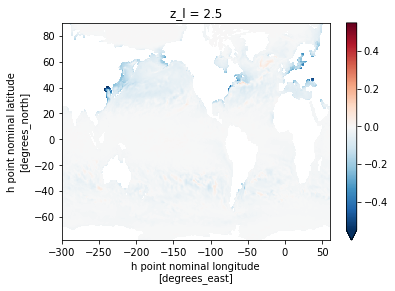

In [23]:
# incorrect way to calculate mean annual potential density
tmp=xr.apply_ufunc(pdens, ds.so.mean(dim='time'), dc.thetao.mean(dim='time'),
                    dask='parallelized',
                    output_dtypes=[dc.so.dtype])
(pty.isel(z_l=0)-tmp.isel(z_l=0)).plot(vmin=-0.55,vmax=0.55,cmap='RdBu_r')

# Evaluate DOC differences at surface and in top 100 m

In [24]:
dsy.ldon

<xarray.DataArray 'ldon' (time: 1, z_l: 35, yh: 576, xh: 720)>
dask.array<open_dataset-f91be55014b33f746a88dddcf1d19469ldon, shape=(1, 35, 576, 720), dtype=float32, chunksize=(1, 35, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time     (time) object 1998-01-01 00:00:00
Attributes:
    long_name:      labile DON
    units:          mol/kg
    cell_measures:  volume: volcello area: areacello
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [25]:
dsy['totDOC'] = (dsy.ldon + dsy.srdon + dsy.sldon) * cobalt_n_2_c * pty * 1e3
dsy.totDOC.attrs['units'] = 'mmol/m3'

In [26]:
dcy['totDOC'] = (dcy.ldon + dcy.srdon + dcy.sldon) * cobalt_n_2_c * pty_c * 1e3
dcy.totDOC.attrs['units'] = 'mmol/m3'

In [27]:
totDOC_z100int = (dsy.totDOC * dsy.depth_levels).isel(z_l=slice(0,7)).sum(dim='z_l') - \
(dsy.totDOC.isel(z_l=7)*(dsy.depth_levels.isel(z_l=slice(0,7)).sum() - 100.))
# because the first 8 z layers add up to be more than 100 m, subtract out the remainder from layer 8 past 100 m. 
totDOC_z100int = totDOC_z100int.isel(time=0) * 1e-3

In [28]:
gzval = (totDOC_z100int * grid.areacello).sum(dim=['xh','yh']) * carbon_molar_mass
print('DOC in top 100m (GZ): ' + str(np.format_float_scientific(gzval.values,2)) + ' g C')

DOC in top 100m (GZ): 7.91e+15 g C


In [29]:
c_totDOC_z100int = (dcy.totDOC * dsy.depth_levels).isel(z_l=slice(0,7)).sum(dim='z_l') - \
(dcy.totDOC.isel(z_l=7)*(dsy.depth_levels.isel(z_l=slice(0,7)).sum() - 100.))
c_totDOC_z100int = c_totDOC_z100int.isel(time=0) * 1e-3

In [30]:
ctrlval = (c_totDOC_z100int * grid.areacello).sum(dim=['xh','yh']) * carbon_molar_mass
print('DOC in top 100m (Control): ' + str(np.format_float_scientific(ctrlval.values,2)) + ' g C')

DOC in top 100m (Control): 8.07e+15 g C


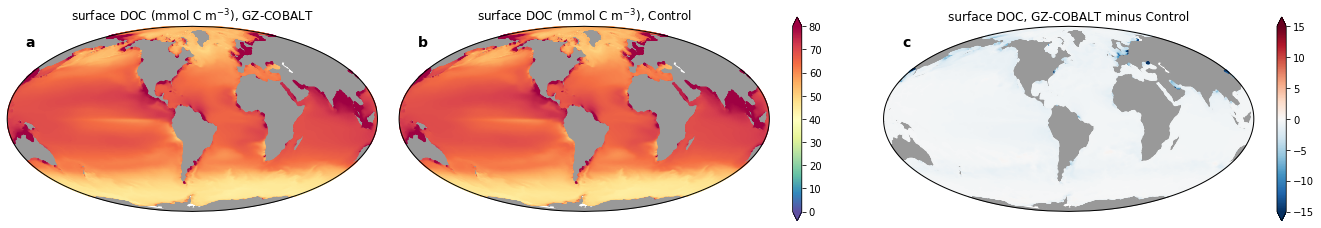

In [31]:
fig=plt.figure(figsize=(24,5))
gs=gridspec.GridSpec(1,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

# mdz/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=dsy.totDOC.isel(z_l=0, time=0).values+40, vmin=0, vmax=80, transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[i].set_title('surface DOC (mmol C m$^{-3}$), GZ-COBALT', fontsize=12)

ax[i].text(0.05, 0.95, 'a', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=dcy.totDOC.isel(z_l=0, time=0).values+40, vmin=0, vmax=80, transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[i].set_title('surface DOC (mmol C m$^{-3}$), Control', fontsize=12)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(dsy.totDOC.isel(z_l=0, time=0) - dcy.totDOC.isel(z_l=0, time=0)).values, vmax=15, vmin=-15, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax[i].set_title('surface DOC, GZ-COBALT minus Control', fontsize=12)
ax[i].text(0.05, 0.95, 'c', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')


plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_surfDOC_Supp.png', dpi=300, bbox_inches='tight')

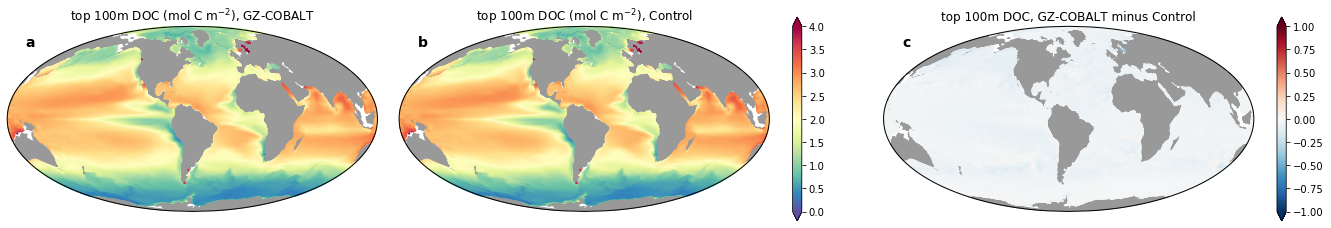

In [32]:
fig=plt.figure(figsize=(24,5))
gs=gridspec.GridSpec(1,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

# mdz/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=totDOC_z100int.values, vmin=0, vmax=4, transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[i].set_title('top 100m DOC (mol C m$^{-2}$), GZ-COBALT', fontsize=12)

ax[i].text(0.05, 0.95, 'a', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_totDOC_z100int.values, vmin=0, vmax=4, transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[i].set_title('top 100m DOC (mol C m$^{-2}$), Control', fontsize=12)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(totDOC_z100int-c_totDOC_z100int).values, vmax=1, vmin=-1, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax[i].set_title('top 100m DOC, GZ-COBALT minus Control', fontsize=12)
ax[i].text(0.05, 0.95, 'c', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')


plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_DOC_z100int_Supp.png', dpi=300, bbox_inches='tight')

# Evaluate DOC differences in column integral

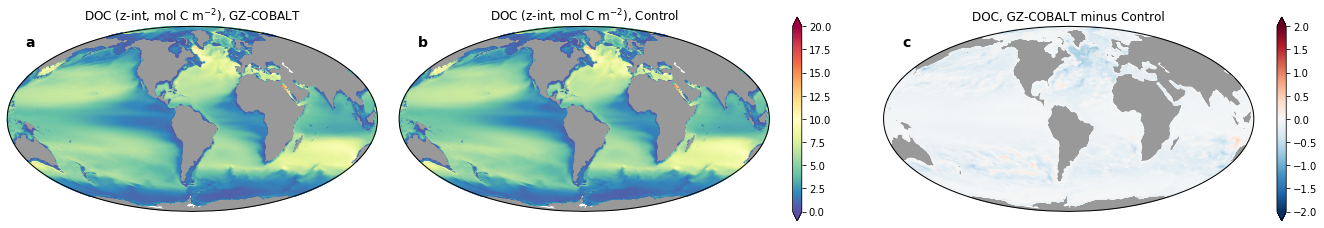

In [33]:
fig=plt.figure(figsize=(24,5))
gs=gridspec.GridSpec(1,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

# mdz/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=ds.wc_vert_int_doc.mean(dim='time'), vmin=0, vmax=20, transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[i].set_title('DOC (z-int, mol C m$^{-2}$), GZ-COBALT', fontsize=12)

ax[i].text(0.05, 0.95, 'a', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=dc.wc_vert_int_doc.mean(dim='time'), vmin=0, vmax=20, transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[i].set_title('DOC (z-int, mol C m$^{-2}$), Control', fontsize=12)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(ds.wc_vert_int_doc.mean(dim='time') - dc.wc_vert_int_doc.mean(dim='time')), transform=ccrs.PlateCarree(), vmin=-2, vmax=2,cmap='RdBu_r')
ax[i].set_title('DOC, GZ-COBALT minus Control', fontsize=12)
ax[i].text(0.05, 0.95, 'c', transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')


plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_DOC_Supp.png', dpi=300, bbox_inches='tight')